In [51]:
import pandas as pd
import numpy as np
import csv
import random as rnd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn import preprocessing
%matplotlib inline
import math
import matplotlib.lines as line

## Read file into dataframe

In [3]:
df = pd.read_csv("regLinPoli2.csv") ##insert your own path

## Divide in train and test

In [4]:
X_train, X_test, Y_train, Y_test = train_test_split(df[df.columns[0:-1]],df[[df.columns[-1]]], train_size=0.75)
#print X_train.columns.values

### I recommend that after manipulating data using pandas and before modelling to convert dataframes into arrays. This may avoid some headaches

In [5]:
X_train=np.asarray(X_train)
X_test=np.asarray(X_test)
Y_train=np.asarray(Y_train)
Y_test=np.asarray(Y_test)

## Procedure for data standardizing

In [6]:
# This procedure is useful for classroom examples. For a real implementation you have to have a separete method 
# for transforming the production data so you can transform it as you get it with the fitted scaler
## The procedure returns a standardized copy of the input data
def normalize(X_train,X_test,Y_train,Y_test,do=True):

    scale_X=preprocessing.StandardScaler()
    scale_y=preprocessing.StandardScaler()
    
    train_X=np.copy(X_train)
    train_y=np.copy(Y_train)
    test_X=np.copy(X_test)
    test_y=np.copy(Y_test)
    if do:
        scale_X.fit(train_X)
        scale_y.fit(train_y)
        train_X=scale_X.transform(train_X)
        train_y=scale_y.transform(train_y)
        test_X=scale_X.transform(test_X)
        test_y=scale_y.transform(test_y)
    return train_X,test_X, train_y, test_y

## Incremental regularized regression procedures

In [7]:
## Transfer function
def salida(w,X):
    return X.dot(w[1:]) +w[0]


In [8]:
## Training function
def entrena(X,y,w,la=0.0,eta=0.01):
    
    for i in range(len(X)):
        error=y[i]-salida(w,X[i])
        w[0]=w[0]+eta*(error)
        w[1:]=w[1:]+eta*(error*X[i])-la*w[1:]
    return w


## Error function

In [9]:
def calcError(X,y,w,w0):
    return np.mean((X.dot(w)+w0-y)**2)

## Use

In [10]:
train_X,test_X,train_y,test_y=normalize(X_train,X_test,Y_train,Y_test)

In [11]:
w=np.asarray([rnd.random() for i in range(1+len(train_X[0]))])
for i in range(100):
    w=entrena(train_X,train_y,w,la=0.00)

In [12]:
## flatten here to convert y from a matrix to a vector. Only 1 response variable
print calcError(train_X,train_y.flatten(),w[1:],w[0])
print calcError(test_X,test_y.flatten(),w[1:],w[0])

0.57384732674
0.60130607521


In [47]:
trers=dict()
tters=dict()
testerrs=[]
trainingerrs=[]
lams=[]
for lam2 in range(500):
    lam=lam2/10000.0
    trers[lam]=[]
    tters[lam]=[]
    lams.append(lam)
    for k in range(10):
        lb=int(math.floor(k*(len(train_X)/10)))
        ub=int(math.floor((k+1)*(len(train_X)/10)))
        if lb>0 and ub<len(train_X):
            trx2=np.concatenate([train_X[0:lb-1],train_X[ub:len(train_X)]])
            try2=np.concatenate([train_y[0:lb-1],train_y[ub:len(train_X)]])
        else:
            if lb>0:
                trx2=train_X[0:lb-1]
                try2=train_y[0:lb-1]
            else:
                trx2=train_X[ub:]
                try2=train_y[ub:]
        ttx2=train_X[lb:ub-1]
        tty2=train_y[lb:ub-1]
        trx2, ttx2, try2, tty2=normalize(trx2, ttx2, try2, tty2)
        w=entrena(trx2,try2,w,la=lam)
        trers[lam].append(calcError(trx2,try2.flatten(),w[1:],w[0]))
        tters[lam].append(calcError(ttx2,tty2.flatten(),w[1:],w[0]))
    testerrs.append(np.mean(tters[lam]))
    trainingerrs.append(np.mean(trers[lam]))

In [100]:
def partition(X):
    indice=[np.random.randint(1,11) for i in range(len(X))]
    x_train=np.array(X[[i==10 for i in indice]])
    return x_train

In [61]:
mintest=np.argmin(testerrs)
mintrain=np.argmin(trainingerrs)


Best lambda is: 0.0035


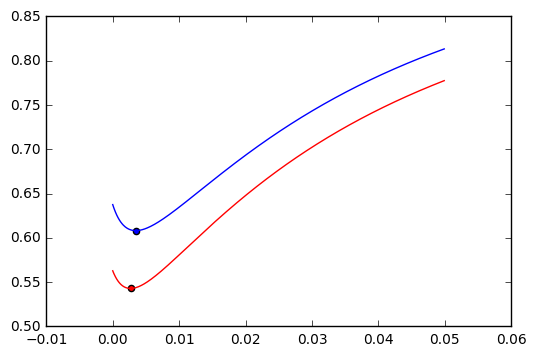

In [67]:
plt.plot(lams, testerrs);
plt.plot(lams, trainingerrs, c='red');
plt.scatter(lams[mintest], testerrs[mintest])
plt.scatter(lams[mintrain], trainingerrs[mintrain], c='red')
print "Best lambda is: "+str(lams[mintest])